In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**For Windows**

In [5]:

df = pd.read_csv('C:\\Users\\Public\\sendy_machine_learning\\Sendy.csv') 

**For Mac**

In [298]:
df = pd.read_csv('/Users/tshmacm1168/Desktop/machine learning project/sendy_machine_learning/Sendy.csv')

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Vehicle Type                               21201 non-null  int64  
 1   Platform Type                              21201 non-null  int64  
 2   Personal or Business                       21201 non-null  int64  
 3   Placement - Day of Month                   21201 non-null  int64  
 4   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 5   Placement - Time                           21201 non-null  int64  
 6   Confirmation - Day of Month                21201 non-null  int64  
 7   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 8   Confirmation - Time                        21201 non-null  int64  
 9   Arrival at Pickup - Day of Month           21201 non-null  int64  
 10  Arrival at Pickup - We

In [310]:
df.isnull().sum()

Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature                                  0
Pickup Lat                                   0
Pickup Long  

**Encoding**

In [311]:
df

,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,...,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,0,3,0,9,5,34546,9,5,34810,9,...,9,5,38395,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745
1,0,3,1,12,5,40576,12,5,41001,12,...,12,5,44242,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993
2,0,3,0,30,2,45565,30,2,45764,30,...,30,2,3638,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455
3,0,3,0,15,5,33934,15,5,33965,15,...,15,5,36327,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341
4,0,1,1,13,1,35718,13,1,35778,13,...,13,1,37537,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,0,3,1,20,3,14078,20,3,14109,20,...,20,3,15617,3,28.600000,-1.258414,36.804800,-1.275285,36.802702,9
21197,0,3,0,13,6,36814,13,6,36821,13,...,13,6,38777,7,26.000000,-1.307143,36.825009,-1.331619,36.847976,770
21198,0,3,0,7,4,18376,7,4,18429,7,...,7,4,24005,20,29.200000,-1.286018,36.897534,-1.258414,36.804800,2953
21199,0,1,1,4,3,34299,4,3,34313,4,...,4,3,36495,13,15.000000,-1.250030,36.874167,-1.279210,36.794872,1380


**Converting categorical to numerical**

In [301]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Order No'] = label_encoder.fit_transform(df['Order No'])
df['User Id'] = label_encoder.fit_transform(df['User Id'])
df['Vehicle Type'] = label_encoder.fit_transform(df['Vehicle Type'])
df['Personal or Business'] = label_encoder.fit_transform(df['Personal or Business'])
df['Rider Id'] = label_encoder.fit_transform(df['Rider Id'])


**Converting to seconds**

In [302]:
df.columns = df.columns.str.strip()

def convert_to_seconds(x):
    # Remove AM/PM if present
    if 'AM' in x or 'PM' in x:
        x = x.split(' ')[0]  # Only take the time part (HH:MM:SS)
    
    # Split the time into hours, minutes, and seconds
    parts = x.split(':')
    hours = int(parts[0]) * 3600  # Convert hours to seconds
    minutes = int(parts[1]) * 60  # Convert minutes to seconds
    seconds = int(parts[2])       # Keep seconds as is
    
    return hours + minutes + seconds  # Total seconds

# Apply the function to the 'Arrival at Destination - Time' and 'Pickup - Time' columns
df['Arrival at Destination - Time'] = df['Arrival at Destination - Time'].apply(convert_to_seconds)
df['Pickup - Time'] = df['Pickup - Time'].apply(convert_to_seconds)
df['Arrival at Pickup - Time'] = df['Arrival at Pickup - Time'].apply(convert_to_seconds)
df['Confirmation - Time'] = df['Confirmation - Time'].apply(convert_to_seconds)
df['Placement - Time'] = df['Placement - Time'].apply(convert_to_seconds)


**Converting time, extracting only hours**

In [12]:
df.columns = df.columns.str.strip()
def converttohour(x):
    hour = x.split(':')[0]
    return hour
    
df['Arrival at Destination - Time'] = df['Arrival at Destination - Time'].apply(converttohour)


In [13]:
df.columns = df.columns.str.strip()
def converttohour(x):
    hour = x.split(':')[0]
    return hour
    
df['Placement - Time'] = df['Placement - Time'].apply(converttohour)

In [14]:
df.columns = df.columns.str.strip()
def converttohour(x):
    hour = x.split(':')[0]
    return hour
    
df['Confirmation - Time'] = df['Confirmation - Time'].apply(converttohour)

In [303]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [289]:
df.describe()

,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,...,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,time_diff_seconds
count,21201.0,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,0.0,2.752182,0.180039,15.653696,3.240083,26075.234800,15.653837,3.240225,25823.818971,15.653837,...,3.240225,24135.408424,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947,-933.074808
std,0.0,0.625178,0.384229,8.798916,1.567295,14710.524863,8.798886,1.567228,14703.064869,8.798886,...,1.567228,14596.742398,5.668963,3.222006,0.030507,0.037473,0.034824,0.044721,987.270788,9949.728902
min,0.0,1.000000,0.000000,1.000000,1.000000,3601.000000,1.000000,1.000000,3600.000000,1.000000,...,1.000000,3600.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000,-43177.000000
25%,0.0,3.000000,0.000000,8.000000,2.000000,11167.000000,8.000000,2.000000,11227.000000,8.000000,...,2.000000,11151.000000,5.000000,21.400000,-1.300921,36.784605,-1.301201,36.785661,882.000000,764.000000
50%,0.0,3.000000,0.000000,15.000000,3.000000,31542.000000,15.000000,3.000000,30839.000000,15.000000,...,3.000000,18795.000000,8.000000,23.258889,-1.279395,36.807040,-1.284382,36.808002,1369.000000,1279.000000
75%,0.0,3.000000,0.000000,23.000000,5.000000,39768.000000,23.000000,5.000000,39718.000000,23.000000,...,5.000000,39491.000000,13.000000,25.300000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,1932.000000
max,0.0,4.000000,1.000000,31.000000,7.000000,46799.000000,31.000000,7.000000,46798.000000,31.000000,...,7.000000,46799.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,7883.000000


**Checking Numerical and Categorical Columns**

In [304]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_col = df.select_dtypes(include=['object']).columns

print("Numerical Col:", numerical_cols)
print("Categorical Col:", categorical_col)

Numerical Col: Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')
Categorical Col: Index([], dtype='object')


**Cleaning Data**

In [312]:
df.dtypes

Vehicle Type                                   int64
Platform Type                                  int64
Personal or Business                           int64
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                               int64
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                            int64
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                       int64
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                  int64
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Arrival at Destination - Time                  int64
Distance (KM)                                 

**Changing data type**

In [17]:
def extract_hour(time_str):
    # Check if the value is a string before splitting
    if isinstance(time_str, str):
        return int(time_str.split(':')[0])  # Extract the hour part
    else:
        return time_str 

In [18]:
time_columns = ["Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", 
                "Pickup - Time", "Arrival at Destination - Time"]

for col in time_columns:
    df[col] = df[col].apply(extract_hour)

**Drop Columns**

In [306]:
df.drop(columns=["Order No", "User Id", "Rider Id"], inplace=True)

In [307]:
df.drop(columns=['Precipitation in millimeters'], inplace = True)

In [308]:
df['Temperature'].fillna(df['Temperature'].mean(), inplace = True)

/var/folders/pl/nw9j1mq920978rdfc418s8fm0000gn/T/ipykernel_83292/2283007735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(df['Temperature'].mean(), inplace = True)


**Comparing variables**

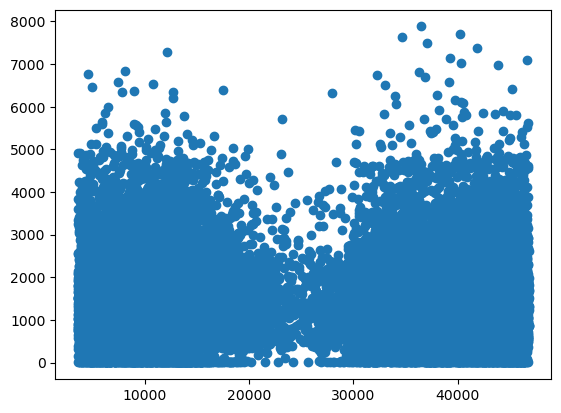

In [313]:
plt.scatter(df['Placement - Time'],df['Time from Pickup to Arrival'])

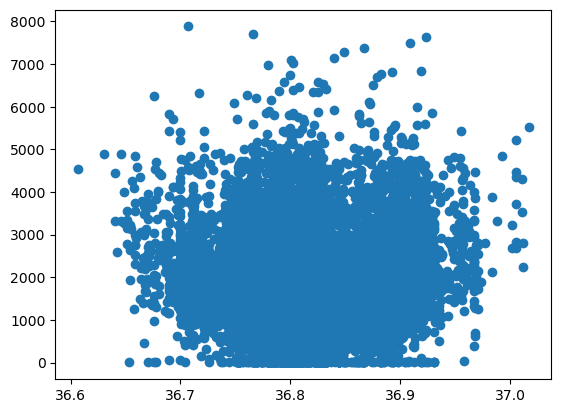

In [314]:
plt.scatter(df['Destination Long'],df['Time from Pickup to Arrival'])

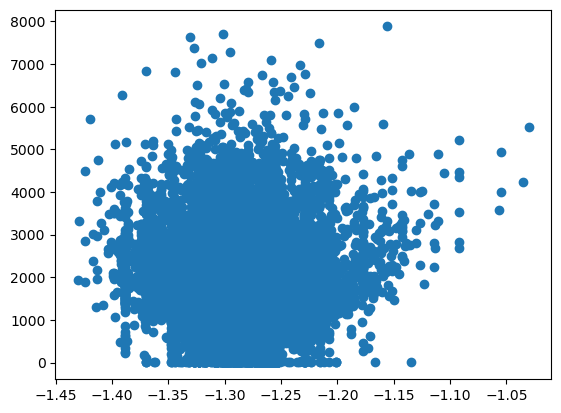

In [315]:
plt.scatter(df['Destination Lat'],df['Time from Pickup to Arrival'])

**Correlation Matrix**

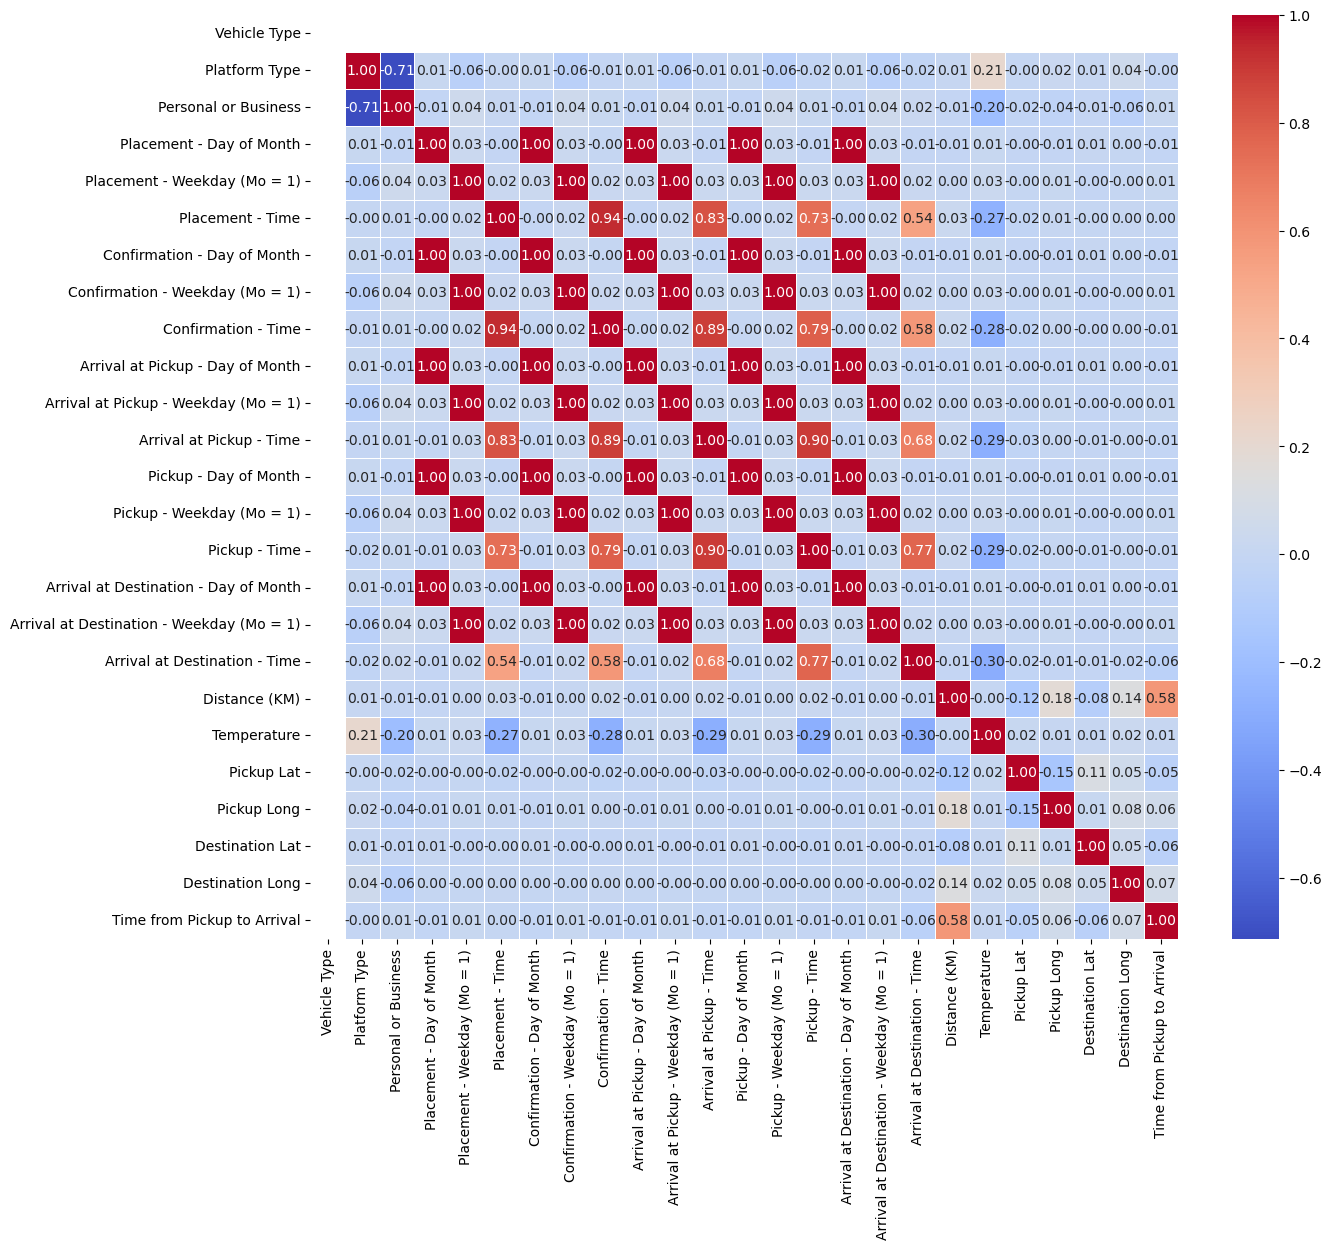

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [271]:
df

,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,...,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,time_diff_seconds
0,0,3,0,9,5,34546,9,5,34810,9,...,5,38395,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745,745
1,0,3,1,12,5,40576,12,5,41001,12,...,5,44242,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993,1993
2,0,3,0,30,2,45565,30,2,45764,30,...,2,3638,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455,-42745
3,0,3,0,15,5,33934,15,5,33965,15,...,5,36327,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341,1341
4,0,1,1,13,1,35718,13,1,35778,13,...,1,37537,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,0,3,1,20,3,14078,20,3,14109,20,...,3,15617,3,28.600000,-1.258414,36.804800,-1.275285,36.802702,9,9
21197,0,3,0,13,6,36814,13,6,36821,13,...,6,38777,7,26.000000,-1.307143,36.825009,-1.331619,36.847976,770,770
21198,0,3,0,7,4,18376,7,4,18429,7,...,4,24005,20,29.200000,-1.286018,36.897534,-1.258414,36.804800,2953,2953
21199,0,1,1,4,3,34299,4,3,34313,4,...,3,36495,13,15.000000,-1.250030,36.874167,-1.279210,36.794872,1380,1380


**Select Features and the Target**

In [358]:
x = df[['Pickup - Time','Arrival at Destination - Time']]
y = df["Time from Pickup to Arrival"]

**Passing x and y into the train_test_split**

In [346]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [347]:
model = DecisionTreeRegressor()  # Choose a model
model.fit(x_train,y_train)  # Fit the model

DecisionTreeRegressor()

In [352]:
model.predict(x_test)  # Make predictions

array([1953., 1778.,    7., ..., 2184., 2617., 1008.])

In [353]:
model.score(x_test, y_test)  #Test the accuracy

0.9833558604419086

In [ ]:
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
